In [1]:
#> python3 -m pip install --upgrade tensorflowhttp://localhost:8888/notebooks/Untitled.ipynb?kernel_name=python3#
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
tf.__version__

====================CLASSIFICATION

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

    1. scale pixel density to 0-1, 
    2. carve out validation set, and trainset

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

    fashion_MNIST needs manual naming to target values naming

In [4]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Fluffy Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Fluffy Coat'

       use Sequential API, build a neural network (2-layer MLP)
       Sequential MLP is the simpliest form of ANN , that is a single stack of layers connectioned sequentially

In [5]:
model = keras.models.Sequential([

keras.layers.Flatten(input_shape = [28,28]),
keras.layers.Dense(300, activation = "relu"),
keras.layers.Dense(100, activation = "relu"),
keras.layers.Dense(10, activation = "softmax") #last layer spit out 10 classes
    
])
print(model.layers)
print(model.summary())

[<tensorflow.python.keras.layers.core.Flatten object at 0x0000025E825CBE80>, <tensorflow.python.keras.layers.core.Dense object at 0x0000025E825E3240>, <tensorflow.python.keras.layers.core.Dense object at 0x0000025E825E33C8>, <tensorflow.python.keras.layers.core.Dense object at 0x0000025E825E36D8>]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_______________

       Note: 266,610 = 300 (nodes) x 784 (features) + 300 (bias terms, b)

In [6]:
# access layers and Weights/Bias

hidden_l1 = model.layers[1]
w1, b1 = hidden_l1.get_weights()
print(w1.shape)
print(b1.shape)
print(w1)

(784, 300)
(300,)
[[-0.04027531 -0.01628331  0.06248574 ... -0.00232435 -0.02441814
  -0.05989999]
 [-0.02362031  0.03092918  0.02823888 ...  0.05892481  0.00271996
   0.01017795]
 [-0.05298315  0.05089621  0.03095527 ...  0.04121183  0.01072053
   0.05988529]
 ...
 [ 0.03612443  0.03595745 -0.04586122 ...  0.04493187 -0.06833654
   0.06011949]
 [-0.03007263 -0.01789489  0.04904281 ...  0.00752498  0.06281549
  -0.05231562]
 [ 0.04993524  0.01404948 -0.04434463 ...  0.02368025 -0.05246213
   0.04663363]]


initial weights are random, initial bias are 0s, 
to change this, use kernel_initializer ,bias_initializer via https://keras.io/initializers

____________________

Use compile() to set loss_function, optimizer/learning_algo, and accuracy metrics<BR>
when using SGD (Stochastic Gradient Decsent, tuning learning rate is critical)

In [7]:
model.compile(
    loss= "sparse_categorical_crossentropy", 
    optimizer=keras.optimizers.SGD(lr = 0.01), 
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.7176 - accuracy: 0.7637 - val_loss: 0.5249 - val_accuracy: 0.8168
Epoch 2/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4852 - accuracy: 0.8305 - val_loss: 0.4679 - val_accuracy: 0.8332
Epoch 3/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4421 - accuracy: 0.8449 - val_loss: 0.4302 - val_accuracy: 0.8504
Epoch 4/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4152 - accuracy: 0.8533 - val_loss: 0.4075 - val_accuracy: 0.8580
Epoch 5/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3959 - accuracy: 0.8596 - val_loss: 0.3991 - val_accuracy: 0.8584
Epoch 6/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3794 - accuracy: 0.8657 - val_loss: 0.4158 - val_accuracy: 0.8542
Epoch 7/30
55000/55000 [==============================] -

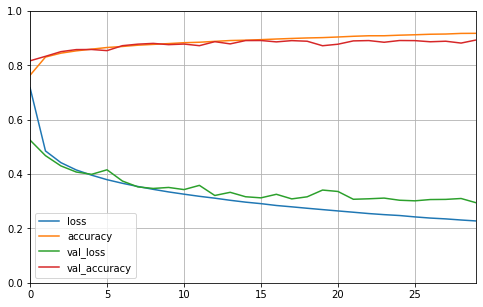

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Hierarchy of fine-tuning your hyperparameters
1. learning rate
2. optimizer (and then learning rate)
3. number of layers, 
4. number of nerous per layers
5. batch size

Once validation/accuracy is good enough on the validation set

evaulate the fitted model on test set:

In [ ]:
model.evaluate(X_test, y_test)

.predict() and .predict_classes()

the former produces probabilities for each class <br>
the latter produces the class with the highest 

In [10]:
print((model.predict(X_test[:3])).round(3))
y_pred = (model.predict_classes(X_test[:2]))
print(y_pred)
np.array(class_names)[y_pred]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 2]


array(['Ankle boot', 'Pullover'], dtype='<U11')

====================REGRESSION

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model_r = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_r.compile(loss="mean_squared_error", optimizer = "sgd")
history = model_r.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.8655 - val_loss: 1.0116
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.1282 - val_loss: 0.4854
Epoch 3/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4573 - val_loss: 0.4323
Epoch 4/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4138 - val_loss: 0.4419
Epoch 5/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4133 - val_loss: 0.3949
Epoch 6/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3909 - val_loss: 0.3958
Epoch 7/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3807 - val_loss: 0.4094
Epoch 8/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4109 - val_loss: 0.3835
Epoch 9/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3771 - val_l

In [12]:
mse_test = model_r.evaluate(X_test, y_test)
y_pred_r = model_r.predict(X_test[:3])
print(y_pred_r)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[[1.5801377 ]
 [2.3226275 ]
 [0.64485115]]
